In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("13-car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ["buying","maint","doors","persons","lug_boot","safety","class"]

In [9]:
df.columns = col_names

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [14]:
for col in df.columns:
    print(df[col].value_counts())
    print("----------------------")

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
----------------------
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
----------------------
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
----------------------
persons
4       576
more    576
2       575
Name: count, dtype: int64
----------------------
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
----------------------
safety
med     576
high    576
low     575
Name: count, dtype: int64
----------------------
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64
----------------------


In [16]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [18]:
df["doors"] = df["doors"].replace("5more","5")

In [19]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [20]:
df["doors"] = df["doors"].astype(int)

In [21]:
df["doors"]

0       2
1       2
2       2
3       2
4       2
       ..
1722    5
1723    5
1724    5
1725    5
1726    5
Name: doors, Length: 1727, dtype: int64

In [22]:
df["persons"]

0          2
1          2
2          2
3          2
4          2
        ... 
1722    more
1723    more
1724    more
1725    more
1726    more
Name: persons, Length: 1727, dtype: object

In [23]:
df["persons"] = df["persons"].replace("more", "5")

In [24]:
df["persons"] = df["persons"].astype(int)

In [37]:
X = df.drop("class", axis=1)
y = df["class"]

In [43]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5,5,med,med
1723,low,low,5,5,med,high
1724,low,low,5,5,big,low
1725,low,low,5,5,big,med


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [44]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1326,low,vhigh,3,2,med,med
1497,low,high,5,4,med,med
1440,low,high,3,4,small,med
1321,low,vhigh,2,5,big,high
1239,med,low,3,5,big,med
...,...,...,...,...,...,...
667,high,med,2,5,small,high
156,vhigh,high,3,5,med,med
384,vhigh,low,4,2,big,med
645,high,high,5,5,big,med


In [40]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
categorical_cols = ["buying","maint","lug_boot","safety"]
numerical_cols = ["doors","persons"]
ordinal_encoder = OrdinalEncoder(categories=[
    ["low","med","high","vhigh"],
    ["low","med","high","vhigh"],
    ["small","med","big"],
    ["low","med","high"]
])

preprocessor = ColumnTransformer(transformers=[
    ("transformation_name", ordinal_encoder, categorical_cols)
], remainder="passthrough")

In [42]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [46]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5
0,0.0,3.0,1.0,1.0,3.0,2.0
1,0.0,2.0,1.0,1.0,5.0,4.0
2,0.0,2.0,0.0,1.0,3.0,4.0
3,0.0,3.0,2.0,2.0,2.0,5.0
4,1.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...
1203,2.0,1.0,0.0,2.0,2.0,5.0
1204,3.0,2.0,1.0,1.0,3.0,5.0
1205,3.0,0.0,2.0,1.0,4.0,2.0
1206,2.0,2.0,2.0,1.0,5.0,5.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)

In [49]:
tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
y_pred = tree_model.predict(X_test_transformed)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
0.7861271676300579


In [53]:
from sklearn import tree

[Text(0.3333333333333333, 0.875, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

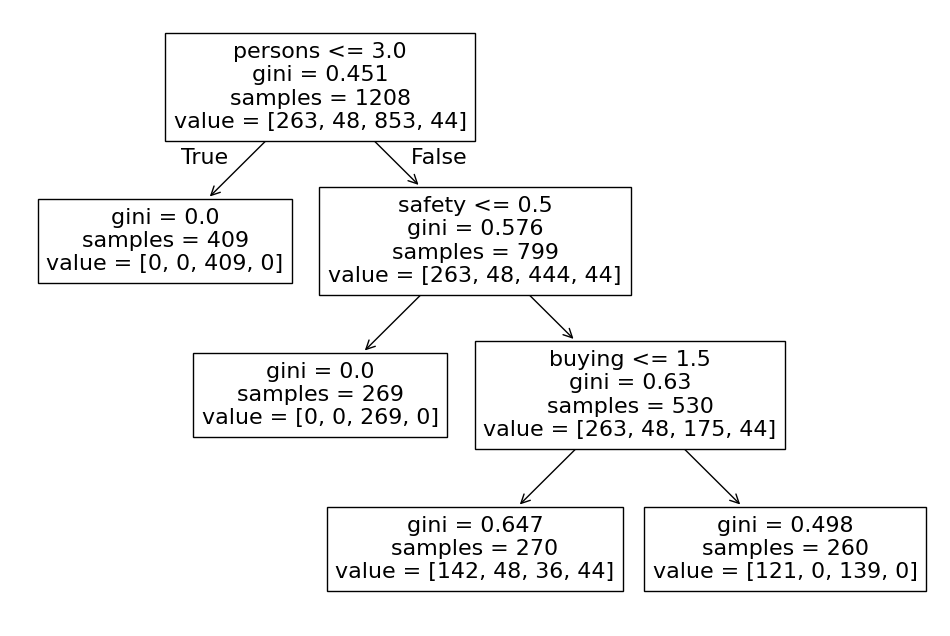

In [56]:
plt.figure(figsize=(12,8))
column_names = ["buying","maint","lug_boot","safety","doors","persons"]
tree.plot_tree(tree_model.fit(X_train_transformed, y_train), feature_names=column_names)

In [57]:
param = {
    "criterion":["gini","entropy","log_loss"],
    "splitter": ["best","random"],
    "max_depth": [1,2,3,4,5,15,None],
    "max_features": ["sqrt","log2",None],
}
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param, n_jobs=-1, cv=5, scoring="accuracy")

In [59]:
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [60]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [62]:
y_pred = grid.predict(X_test_transformed)

In [65]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9730250481695568
[[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



In [68]:
df_new = pd.read_csv("11-iris.csv")

In [69]:
df_new

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
X = df_new.drop(["Id","Species"], axis=1)
y = df_new["Species"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
tree_model = DecisionTreeClassifier()

In [73]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_pred = tree_model.predict(X_train)